# *Customer Segmentation Using Unsupervised Learning*

<p style='font-size:20px;'><i>The objective is to cluster customers based on their spending habits and propose marketing strategies tailored to each segment. We will use KMeans Clustering technique to segment the customers into clusters and use PCA and t-SNE to visualize the clusters.</i></p>

## *Data Cleaning and Preprocessing*

### *Importing Libraries*

In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### *Loading the dataset*

In [2]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('Mall_Customers.csv')

### *Displaying and analysing the dataset*

In [3]:
# Display the first five rows to get a quick preview
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Display the number of rows and columns 
df.shape

(200, 5)

In [5]:
# Display overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
# Display statistical summary of the numerical features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### *Checking for nulls and duplicates*

In [7]:
# Check for null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Check for duplicate rows
df.duplicated().sum()

0

## *Exploratory Data Analysis*

### *Univariate Analysis*

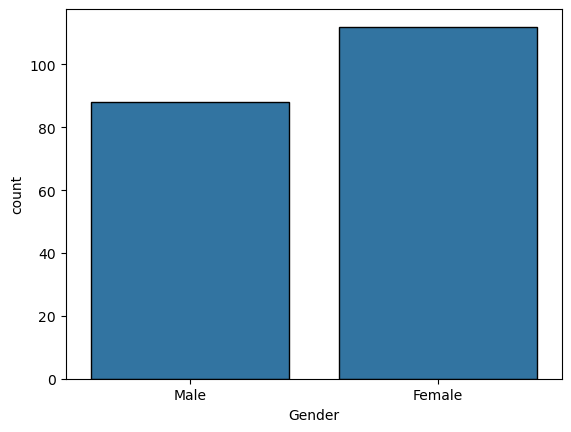

In [9]:
# Plot countplot of 'Gender' column
sns.countplot(x=df['Gender'], edgecolor='black')
plt.show()

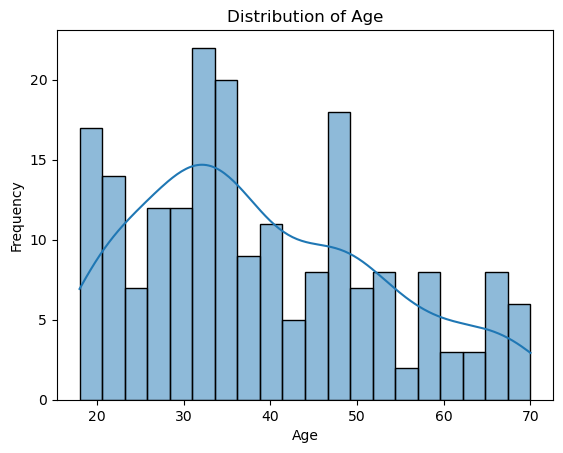

In [10]:
# Plot histogram of the 'age' column
sns.histplot(df['Age'], kde=True, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

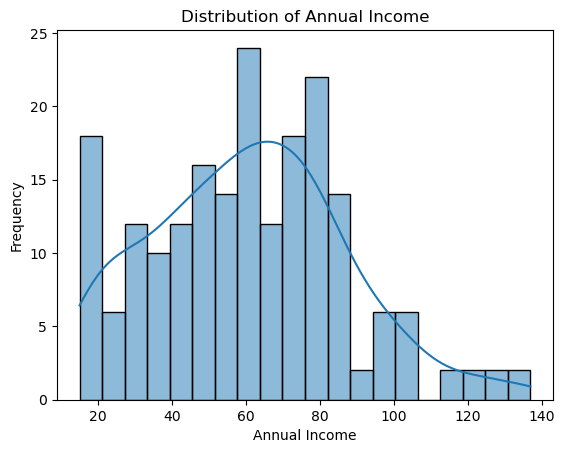

In [11]:
# Plot histogram of the 'Annual Income' column
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, edgecolor='black')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')
plt.show()

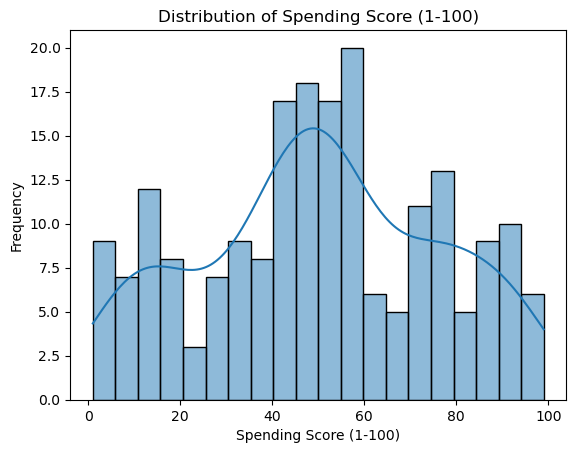

In [12]:
# Plot histogram of the 'Spending Score' column  
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, edgecolor='black')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Distribution of Spending Score (1-100)')
plt.show()

## *Bivariate Analysis*

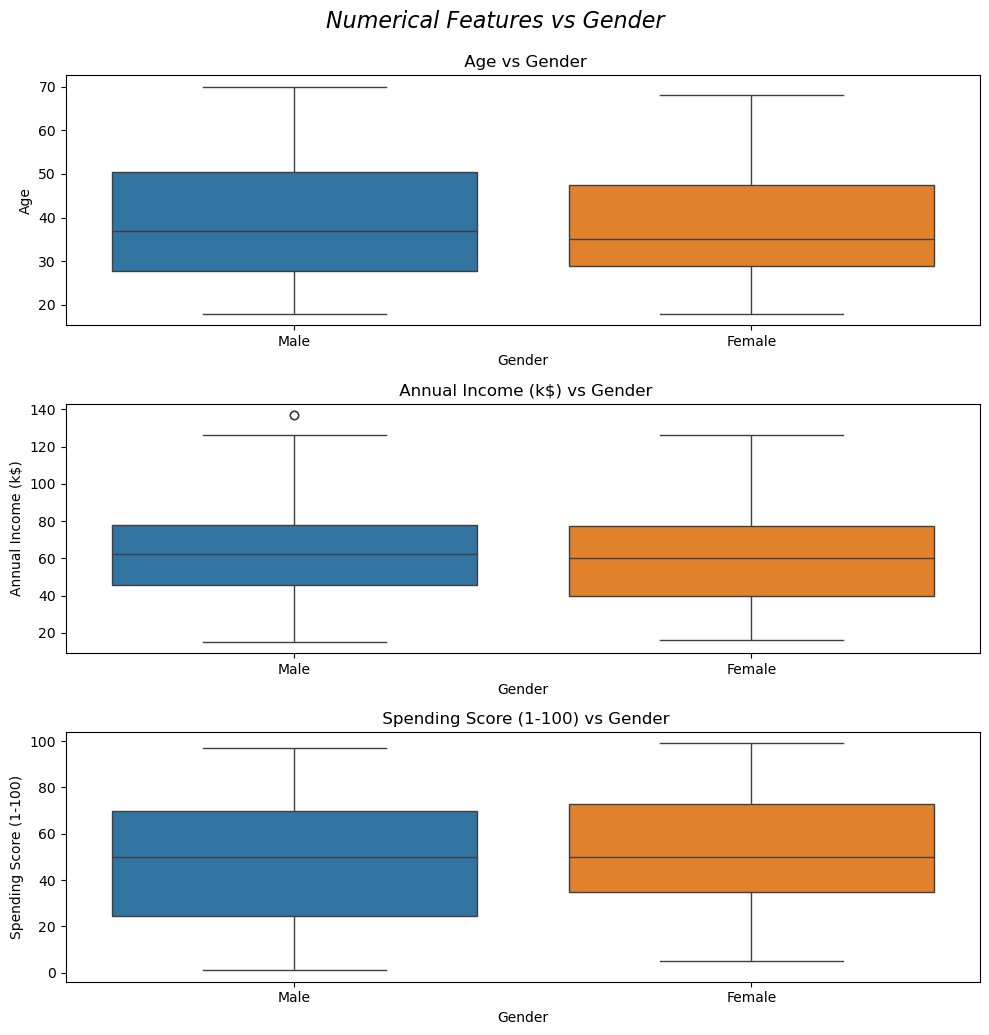

In [13]:
# Bivariate analysis of numerical features vs Gender

# Separate the numerical features/columns for analysis
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Plot the box plots using subplots
plt.figure(figsize=(10, 10))
for i, col in enumerate(numerical_cols):
    # Subplots for boxplots
    plt.subplot(len(numerical_cols), 1, i+1)
    sns.boxplot(data=df, x='Gender', hue='Gender', y=col)
    plt.title(f' {col} vs Gender')

# Adjust layout
plt.tight_layout()
plt.suptitle("Numerical Features vs Gender", y=1.03, fontsize=16, style='italic')
plt.show()

## *Multivariate Analysis*

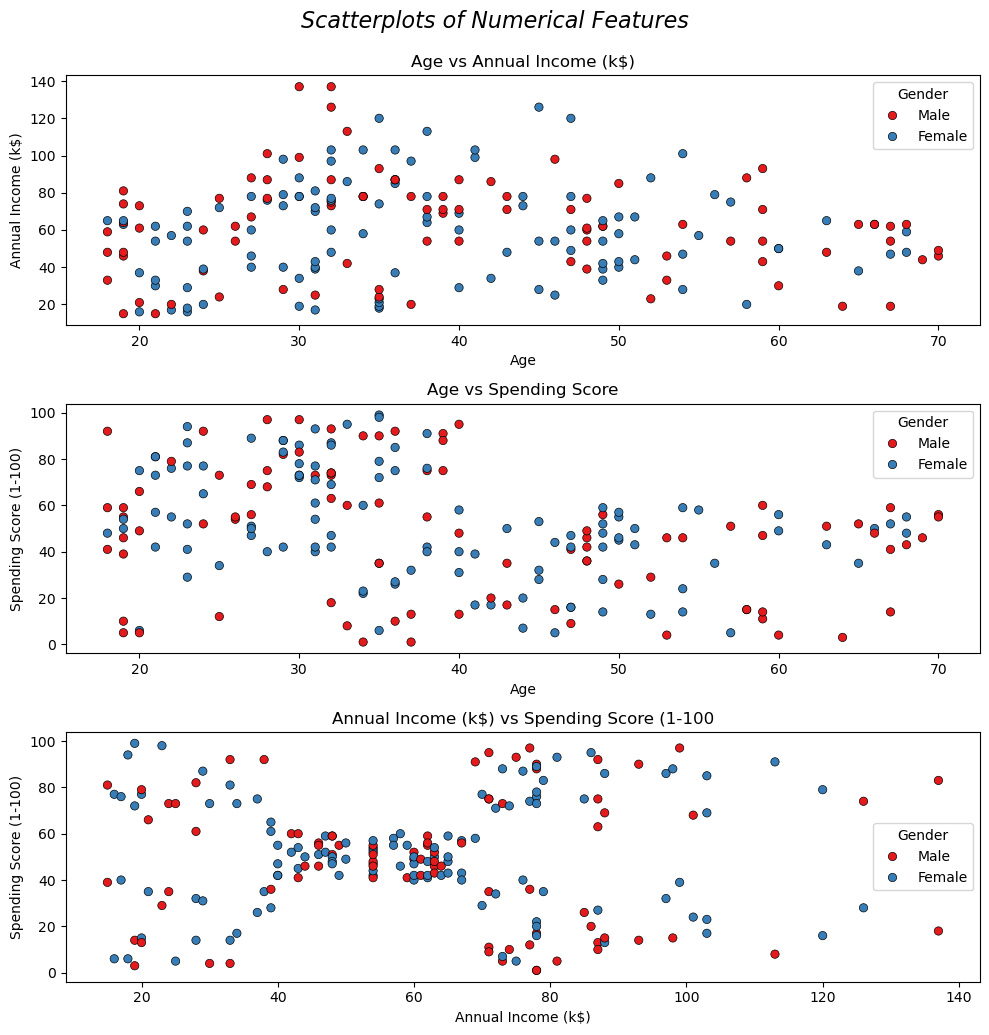

In [14]:
# Scatterplots between numerical features

plt.figure(figsize=(10, 10))

# Age vs Annual Income
plt.subplot(3, 1, 1)
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', palette ='Set1', edgecolor='black')
plt.title('Age vs Annual Income (k$)')

# Age vs Spending Score
plt.subplot(3, 1, 2)
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender', palette='Set1', edgecolor='black')
plt.title('Age vs Spending Score')

# Annual Income vs Spending Score
plt.subplot(3, 1, 3)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set1', edgecolor='black')
plt.title('Annual Income (k$) vs Spending Score (1-100')

# Adjust layout and title
plt.tight_layout()
plt.suptitle("Scatterplots of Numerical Features", y=1.03, fontsize=16, style='italic')
plt.show()
    

## *Feature Encoding*

In [15]:
# Convert categorical 'Gender' column to binary numeric using one-hot encoding
df_enc = pd.get_dummies(df, columns = ['Gender'], drop_first=True).astype(int)

In [16]:
# Display the dataframe after encoding
df_enc

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


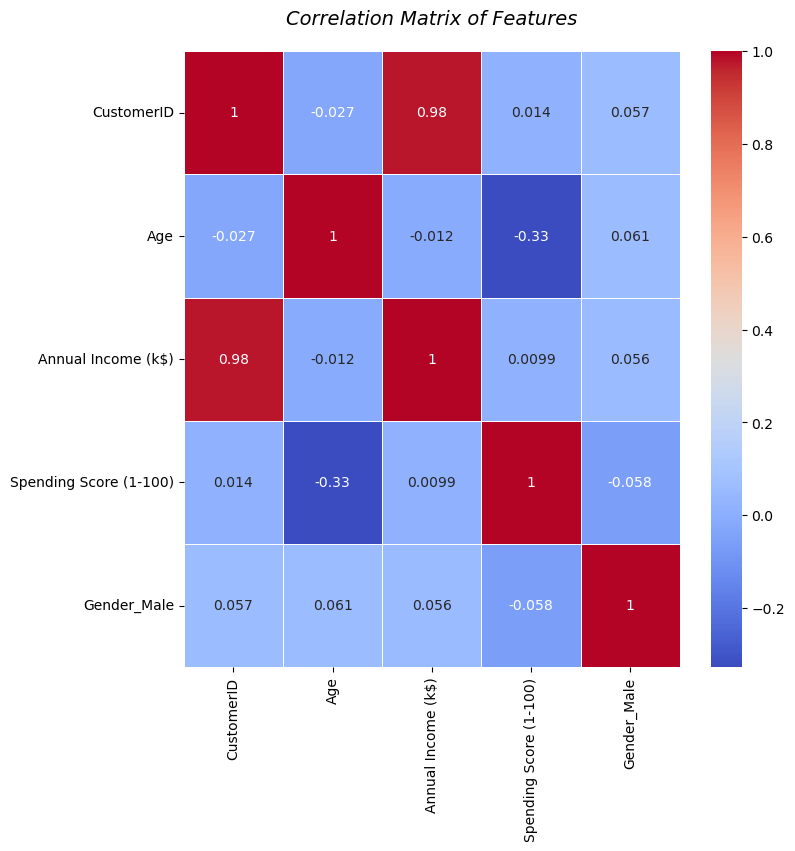

In [17]:
# Plot the correlation matrix of features using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(df_enc.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features", y=1.03, fontsize=14, style='italic')
plt.show()

## *Feature Scaling*

In [18]:
# Import MinMaxScaler from sklearn's preprocessing module
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Separate the columns to be scaled
numerical_cols = ['Age','Annual Income (k$)', 'Spending Score (1-100)']
# Apply scaling to the columns
scaled_cols = scaler.fit_transform(df[numerical_cols])

In [20]:
# Convert the scaled numerical columns back to a dataframe
df_scaled = pd.DataFrame(scaled_cols, index = df[numerical_cols].index, columns=numerical_cols)

In [21]:
# Concatenate the scaled features with the encoded feature into a dataframe
df_final = pd.concat([df_scaled, df_enc['Gender_Male']], axis=1)
df_final

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,0.019231,0.000000,0.387755,1
1,0.057692,0.000000,0.816327,1
2,0.038462,0.008197,0.051020,0
3,0.096154,0.008197,0.775510,0
4,0.250000,0.016393,0.397959,0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0
196,0.519231,0.909836,0.275510,0
197,0.269231,0.909836,0.744898,1
198,0.269231,1.000000,0.173469,1


# *K Means Clustering*

In [22]:
# Import necessary libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to determine the optimal number of clusters (k)
max_k = 10
inertia = [] # Inertia is the average distance between the cluster center (centroid) and the data points within the cluster
silhouette_scores = []
k_values = range(2, max_k +1) # Testing k from 2 to 10

# Iterate through different k values to find the optimal number of clusters
for k in k_values:
    # Initialize and fit KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(df_final)
    
    # Calculate silhouette score (measures how similar points are to their own cluster compared to other clusters)
    sil_score = silhouette_score(df_final, cluster_labels)
    silhouette_scores.append(sil_score)

    # Store inertia (sum of squared distances to closest centroid)
    inertia.append(kmeans.inertia_)
    

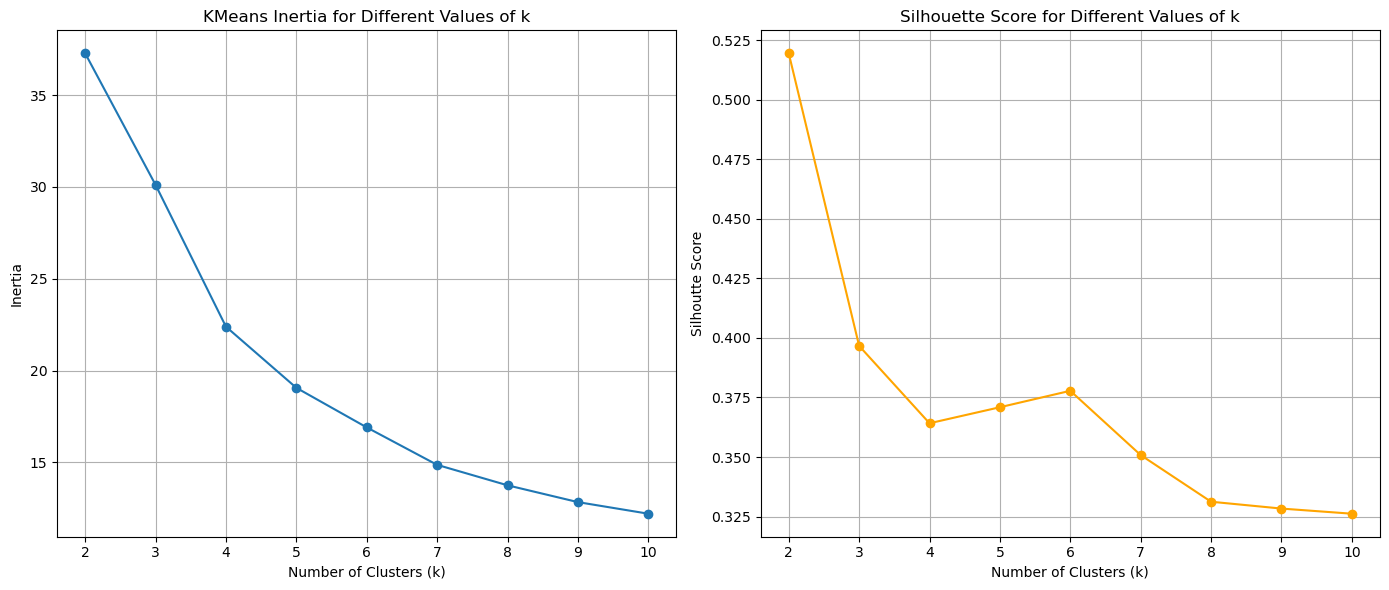

In [24]:
# Create visualizations to help determine optimal k
plt.figure(figsize=(14,6))

# Plot 1: Elbow method visualization
plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

# Plot 2: Silhouette score visualization
plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhoutte Score')
plt.xticks(k_values)
plt.grid(True)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [25]:
# Initialize the KMeans Clustering algorithm with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, max_iter=1000)
# Fit the model to the scaled data and predict cluster labels for each data point
cluster_labels = kmeans.fit_predict(df_final)

In [43]:
# Display the cluster labels
cluster_labels

array([5, 5, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 5, 5, 1, 5, 0, 2, 5, 5,
       1, 5, 1, 5, 1, 5, 1, 2, 0, 2, 0, 5, 1, 2, 1, 2, 1, 2, 1, 5, 0, 2,
       1, 2, 1, 2, 2, 2, 1, 5, 2, 0, 1, 0, 1, 0, 2, 0, 0, 5, 1, 1, 0, 5,
       1, 1, 5, 2, 0, 1, 1, 1, 0, 5, 1, 5, 2, 1, 0, 5, 0, 1, 2, 0, 1, 2,
       2, 1, 1, 5, 0, 1, 2, 5, 1, 2, 0, 5, 2, 1, 0, 5, 0, 2, 1, 0, 0, 0,
       0, 2, 1, 5, 2, 2, 1, 1, 1, 1, 5, 1, 2, 3, 2, 2, 4, 3, 0, 3, 4, 3,
       2, 2, 4, 2, 1, 3, 4, 2, 1, 3, 2, 2, 4, 3, 0, 2, 1, 3, 4, 3, 1, 2,
       1, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 1, 3, 4, 3, 4, 3, 1, 2,
       4, 3, 4, 3, 1, 2, 4, 2, 1, 3, 1, 3, 1, 2, 1, 2, 4, 2, 1, 2, 1, 3,
       4, 3])

## *TSNE for Cluster Visualization*

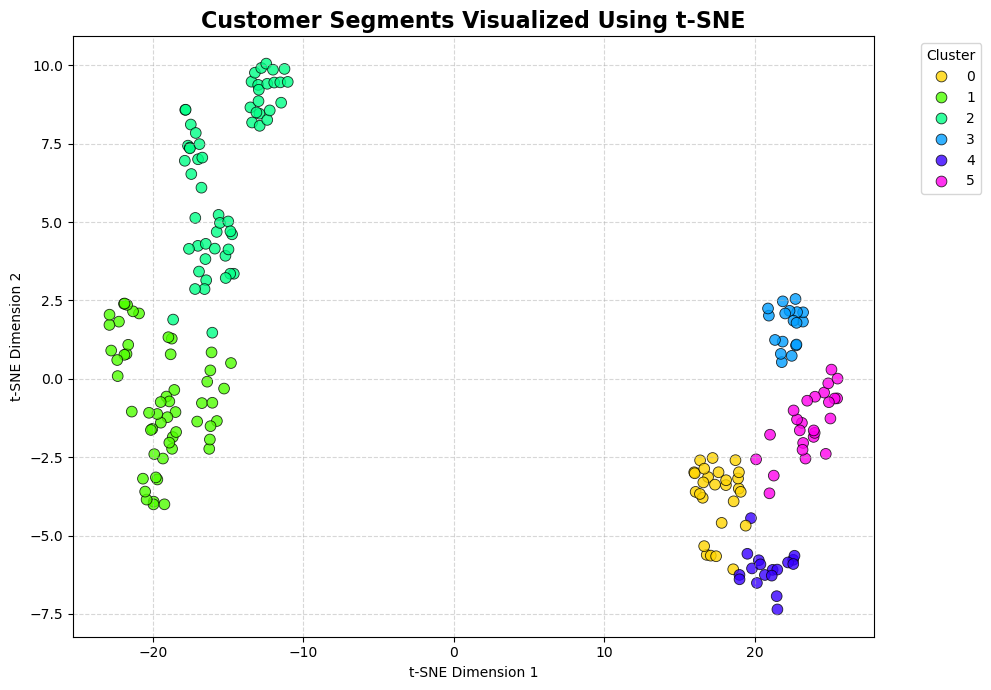

In [27]:
# Import t-SNE
from sklearn.manifold import TSNE

# Initialize and apply t-SNE 
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(df_final)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
tsne_df['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='t-SNE1', y='t-SNE2',
    hue='Cluster',
    palette=sns.color_palette("hsv"),
    data=tsne_df,
    s=60,
    alpha=0.8,
    edgecolor='black'
)

plt.title("Customer Segments Visualized Using t-SNE", fontsize=16, weight='bold')
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## *PCA for Cluster visualization*

In [28]:
# Import PCA for dimensionality reduction
from sklearn.decomposition import PCA
# Initialize PCA 
pca = PCA(n_components=2, random_state=42)
# Apply PCA transformation to the dataset
principalComponents = pca.fit_transform(df_final)
# Convert the PCA results back to a dataframe
PCA_components = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])
# Add the cluster labels to the PCA components dataframe
PCA_components['Cluster']= cluster_labels

In [29]:
# Display the PCA components dataframe
PCA_components

,PC1,PC2,Cluster
0,0.532955,-0.227841,5
1,0.513939,-0.493080,5
2,-0.446266,0.087079,1
3,-0.478796,-0.366617,2
4,-0.451984,0.003006,2
...,...,...,...
195,-0.442610,-0.237388,2
196,-0.405571,0.256687,1
197,0.555315,-0.316617,3
198,0.586009,0.071676,4


In [30]:
# Access the principal components from the PCA model
pca.components_

array([[ 0.05229534,  0.02946581, -0.04906465,  0.99699028],
       [ 0.72547595, -0.02842334, -0.68399818, -0.07087494]])

In [31]:
# Get the proportion of variance explained by each principal component (PC1,PC2)
pca.explained_variance_ratio_

array([0.57076896, 0.21404941])

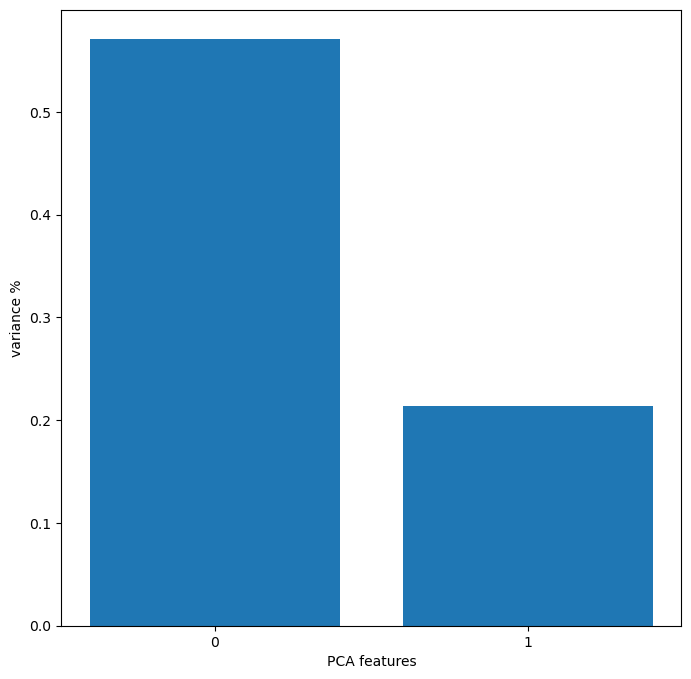

In [34]:
# Create a range of features based on the number of PCA components
features = range(pca.n_components_)
# Create a bar chart showing the explained variance ratio for each PCA component
plt.figure(figsize=(8,8))
plt.bar(features, pca.explained_variance_ratio_)
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

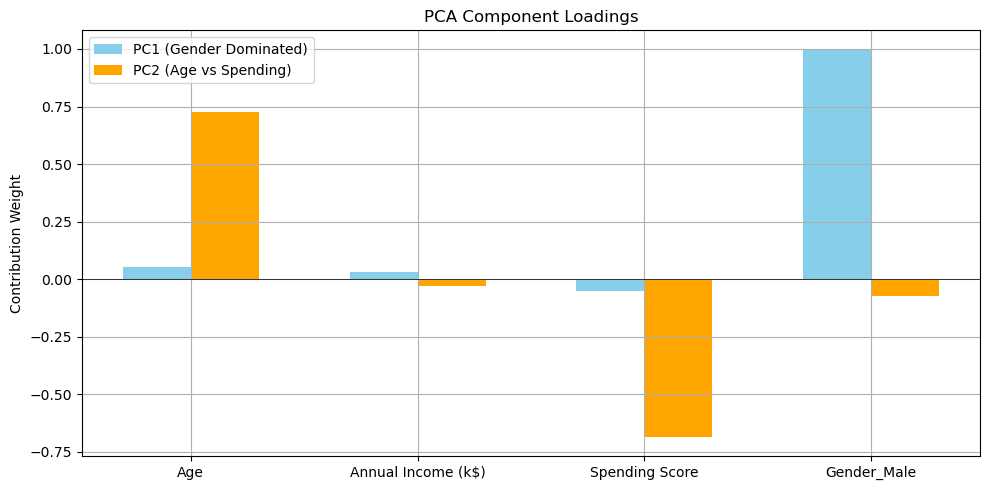

In [35]:
# Feature names in order used for PCA
features = ['Age', 'Annual Income (k$)', 'Spending Score', 'Gender_Male']

# Access PCA components
pc1 = pca.components_[0]
pc2 = pca.components_[1]

x = np.arange(len(features))  # for x-axis positions

plt.figure(figsize=(10, 5))

# Bar chart for PC1
plt.bar(x - 0.15, pc1, width=0.3, label='PC1 (Gender Dominated)', color='skyblue')

# Bar chart for PC2
plt.bar(x + 0.15, pc2, width=0.3, label='PC2 (Age vs Spending)', color='orange')

# Add feature labels
plt.xticks(x, features)
plt.axhline(0, color='black', linewidth=0.5)
plt.title("PCA Component Loadings")
plt.ylabel("Contribution Weight")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


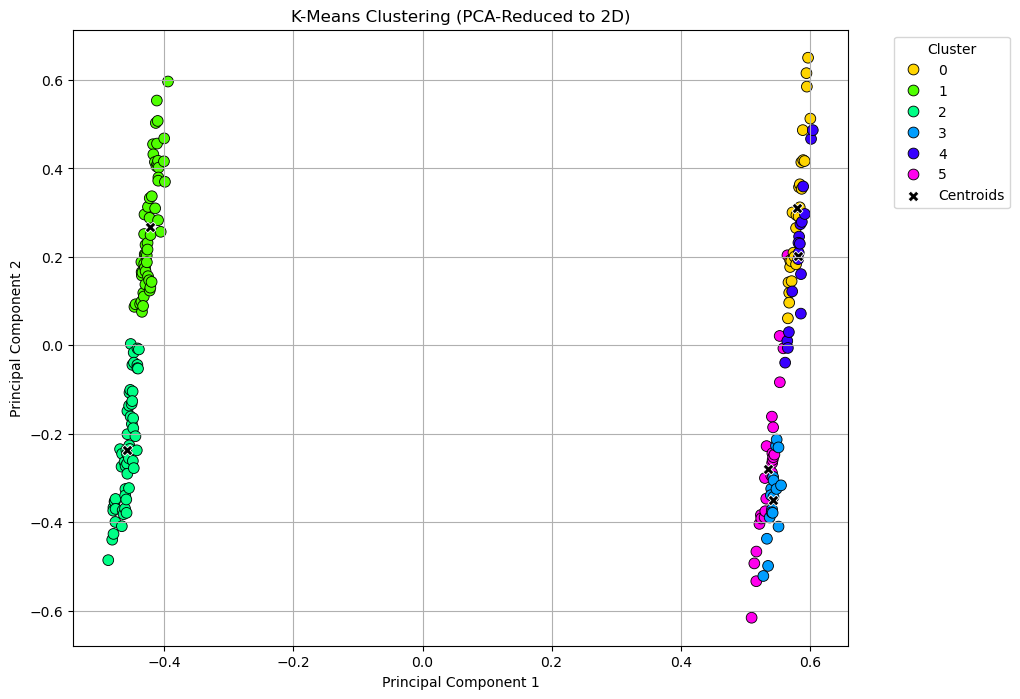

In [36]:
# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    palette=sns.color_palette('hsv'),
    data=PCA_components,
    s=60, edgecolor='black'
)

# Calculate the centroids of each cluster
centroids = PCA_components.groupby('Cluster')[['PC1', 'PC2']].mean().values
# Plot the centroids as black X markers
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], s=60, c='black', marker='X', label='Centroids')

# Add title and axis labels
plt.title('K-Means Clustering (PCA-Reduced to 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend and position it outside the plot
plt.legend(title='Cluster', bbox_to_anchor=(1.05,1))
# Add grid lines
plt.grid(True)
# Display the plot
plt.show()

<p style="font-size:20px;"><i>Key insights from the PCA visualization of clusters are:</i> </p>
<ul style="font-size:20px;"><i>
    <li>Principal Component 1 divides the clusters based entirely on Gender; the left side is predominantly Female and the right side is predominantly male.</li>
    <li>Principal Component 2 divides the clusters based on Age and Spending Score; the upper clusters represent older customers with lower spending and the lower clusters represent younger customers with high spending.</li>
</i></ul>

In [37]:
# Group the PCA components by Cluster and display their descriptive statistics
cluster_summary = PCA_components.groupby('Cluster').describe()
cluster_summary

PC1                                                              \
        count      mean       std       min       25%       50%       75%   
Cluster                                                                     
0        27.0  0.580662  0.010297  0.565966  0.571430  0.579168  0.588164   
1        55.0 -0.422065  0.011779 -0.446266 -0.430909 -0.423541 -0.411865   
2        57.0 -0.458116  0.011724 -0.486824 -0.464502 -0.457185 -0.449442   
3        18.0  0.542869  0.006888  0.527943  0.539692  0.542683  0.548085   
4        18.0  0.582267  0.011891  0.561724  0.574955  0.583902  0.587216   
5        25.0  0.535835  0.014181  0.509762  0.524624  0.540065  0.543042   

                    PC2                                                    \
              max count      mean       std       min       25%       50%   
Cluster                                                                     
0        0.600726  27.0  0.309461  0.162222  0.061100  0.186838  0.294580   
1       -0.394305  55.0  0.268381  0.138599  0.075757  0.157157  0.231553   
2       -0.439386  57.0 -0.235894  0.128081 -0.485735 -0.348547 -0.245382   
3        0.555315  18.0 -0.350220  0.084615 -0.521538 -0.386591 -0.340693   
4        0.604538  18.0  0.201299  0.151964 -0.039179  0.084223  0.219474   
5        0.565282  25.0 -0.279596  0.181321 -0.615903 -0.389072 -0.288114   

                             
              75%       max  
Cluster                      
0        0.415399  0.650308  
1        0.390591  0.596516  
2       -0.136331  0.003006  
3       -0.308271 -0.213123  
4        0.277768  0.486535  
5       -0.227841  0.203590

In [38]:
# Append the cluster labels to the copy of the original dataframe
df_with_labels = df.copy()
df_with_labels['Cluster'] = cluster_labels
df_with_labels

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,1
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,4


In [39]:
# Calculate the average values for each numeric feature within each cluster
cluster_profiles = df_with_labels.drop(columns=['CustomerID']).groupby('Cluster').mean(numeric_only=True).round(1)

In [40]:
# Calculate the count of data points in each cluster and sort by the cluster index
cluster_counts = df_with_labels['Cluster'].value_counts().sort_index()

In [41]:
# Concatenate cluster counts dataframe with the cluster profiles dataframe
cluster_profiles = pd.concat([cluster_profiles, cluster_counts], axis=1)
cluster_profiles

,Age,Annual Income (k$),Spending Score (1-100),count
Cluster,,,,
0,58.4,49.7,39.7,27
1,48.1,58.8,34.8,55
2,28.4,59.7,67.7,57
3,33.3,87.1,82.7,18
4,37.9,86.4,13.0,18
5,25.7,40.4,59.0,25


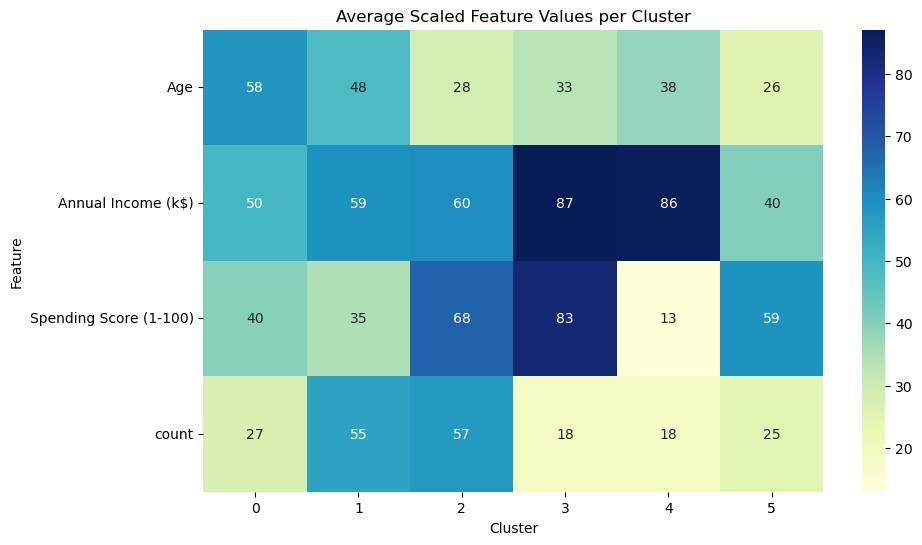

In [45]:
# Generate a heatmap of transposed cluster profiles
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='YlGnBu')
plt.title('Average Scaled Feature Values per Cluster')
plt.ylabel('Feature')
plt.xlabel('Cluster')
plt.show()

## *Naming Cluster Labels*

In [46]:
# Dictionary mapping cluster labels to descriptive customer segment names 
cluster_labels_names = {
    0:"Cautious Seniors",
    1:"Passive Professionals",
    2:"Target Shoppers",
    3:"Premium buyers",
    4:"Frugal Rich",
    5:"Young Savers"
}

# Add cluster_label column to the dataframe that maps the cluster descriptive names to their cluster labels
df_with_labels['Cluster_Label'] = df_with_labels['Cluster'].map(cluster_labels_names)

In [47]:
df_with_labels

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,Cluster_Label
0,1,Male,19,15,39,5,Young Savers
1,2,Male,21,15,81,5,Young Savers
2,3,Female,20,16,6,1,Passive Professionals
3,4,Female,23,16,77,2,Target Shoppers
4,5,Female,31,17,40,2,Target Shoppers
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,Target Shoppers
196,197,Female,45,126,28,1,Passive Professionals
197,198,Male,32,126,74,3,Premium buyers
198,199,Male,32,137,18,4,Frugal Rich


# *Customer Segmentation Summary*
<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr style="background-color:#f2f2f2;">
      <th>Cluster</th>
      <th>Label</th>
      <th>Description</th>
      <th>Strategy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>Cautious Seniors</td>
      <td>Older, moderate income, low-medium spenders. Not very active.</td>
      <td>Build trust with senior-specific offers, loyalty rewards, and personalized support.</td>
    </tr>
    <tr>
      <td>1</td>
      <td>Passive Professionals</td>
      <td>Middle-aged, moderate-high income, low spenders. Likely saving.</td>
      <td>Re-engage with personalized deals and incentives to increase spending activity.</td>
    </tr>
    <tr>
      <td>2</td>
      <td>Target Shoppers</td>
      <td>Young, well-off, high spenders. High marketing potential.</td>
      <td>Drive conversions with trendy product launches, social media ads, and referral bonuses.</td>
    </tr>
    <tr>
      <td>3</td>
      <td>Premium Buyers</td>
      <td>Young-middle aged, very high income, very high spenders. </td>
      <td>Promote exclusivity through VIP programs, luxury branding, and high-end experiences.</td>
    </tr>
    <tr>
      <td>4</td>
      <td>Frugal Rich</td>
      <td>High income but very low spending. Possibly cautious or conservative buyers.</td>
      <td>Appeal with long-term value, ethical branding, and subtle upselling of quality products.</td>
    </tr>
    <tr>
      <td>5</td>
      <td>Young Savers</td>
      <td>Very young, low income, but moderate spenders. Maybe students or early professionals.</td>
      <td>Attract with student deals, gamified discounts, and flexible payment options.</td>
    </tr>
  </tbody>
</table>
